In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_path = "/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/hup/derivatives/clean"

In [3]:
# Base path for the "clean" directory
base_path = "/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/hup/derivatives/clean"

# Get sorted list of subject directories (assumed to start with "sub-")
subject_dirs = sorted([d for d in os.listdir(base_path) 
                       if os.path.isdir(os.path.join(base_path, d)) and d.startswith("sub-")])

# Create a dictionary to map each subject and epoch to its file path
file_paths = {}
for subject in subject_dirs:
    subject_path = os.path.join(base_path, subject)
    epoch_files = sorted([f for f in os.listdir(subject_path) if f.endswith('.pkl')])
    file_paths[subject] = {epoch_idx: os.path.join(subject_path, epoch_file) 
                           for epoch_idx, epoch_file in enumerate(epoch_files, start=1)}

# Print a summary of the file paths mapping
# for subject, epochs in file_paths.items():
#     print(f"{subject}: {len(epochs)} epoch files found")

In [4]:
def load_epoch(subject, epoch):
    """
    Given a subject identifier and epoch number, load and return the corresponding data.
    """
    file_path = file_paths.get(subject, {}).get(epoch)
    if file_path is None:
        raise ValueError(f"File path not found for subject {subject} epoch {epoch}")
    return pd.read_pickle(file_path)

In [5]:
first_subject = subject_dirs[0]
epch1 = load_epoch(first_subject, 1)

print("Keys:", epch1.keys())
print("Metadata:", epch1['metadata'])
print("Data preview:", epch1['data'])

Keys: dict_keys(['data', 'metadata'])
Metadata:               x         y         z                          roi  roiNum  \
labels                                                                     
LA01   -18.7564  14.23870  -1.85164   ctx-lh-medialorbitofrontal  1014.0   
LA02   -22.6455  11.05100  -1.43872                Left-Amygdala    18.0   
LA03   -26.9917   8.25380  -1.96226                 Left-Putamen    12.0   
LA04   -30.1550   4.35347  -1.94623                 Left-Putamen    12.0   
LA05   -33.9026   1.25353  -2.63363                ctx-lh-insula  1035.0   
...         ...       ...       ...                          ...     ...   
RI01    10.9178  36.77530   2.34400  ctx-rh-lateralorbitofrontal  2012.0   
RI02    13.3396  36.00210  11.16460  ctx-rh-lateralorbitofrontal  2012.0   
RI03    15.1485  35.03420  21.01630                ctx-rh-insula  2035.0   
RI06    21.6595  32.43210  49.60950  ctx-rh-rostralmiddlefrontal  2027.0   
RI07    24.0670  31.16130  59.29740   ct

In [11]:
epch1['metadata']

,x,y,z,roi,roiNum,spared
labels,,,,,,
LA01,-18.7564,14.23870,-1.85164,ctx-lh-medialorbitofrontal,1014.0,True
LA02,-22.6455,11.05100,-1.43872,Left-Amygdala,18.0,True
LA03,-26.9917,8.25380,-1.96226,Left-Putamen,12.0,True
LA04,-30.1550,4.35347,-1.94623,Left-Putamen,12.0,True
LA05,-33.9026,1.25353,-2.63363,ctx-lh-insula,1035.0,True
...,...,...,...,...,...,...
RI01,10.9178,36.77530,2.34400,ctx-rh-lateralorbitofrontal,2012.0,True
RI02,13.3396,36.00210,11.16460,ctx-rh-lateralorbitofrontal,2012.0,True
RI03,15.1485,35.03420,21.01630,ctx-rh-insula,2035.0,True


In [7]:
# # out of memory lol oops
# # Loop through subjects and load each epoch as a separate variable
# for subject in subject_dirs:
#     subject_path = os.path.join(base_path, subject)
#     epoch_files = sorted([f for f in os.listdir(subject_path) if f.endswith('.pkl')])
#     # Create a valid Python variable prefix from the subject identifier (replace '-' with '_')
#     subj_prefix = subject.replace('-', '_')
#     for epoch_idx, epoch_file in enumerate(epoch_files, start=1):
#         var_name = f"{subj_prefix}_epch{epoch_idx}"
#         file_path = os.path.join(subject_path, epoch_file)
#         globals()[var_name] = pd.read_pickle(file_path)
#         print(f"Loaded variable: {var_name}")

In [ ]:
# Example: Inspect the first subject's first epoch table
first_subject = subject_dirs[0]
first_var = first_subject.replace('-', '_') + "_epch1"

print(f"Keys of {first_var}: ", globals()[first_var].keys())
print(f"Metadata of {first_var}: ", globals()[first_var]['metadata'])
print(f"Data preview of {first_var}: ", globals()[first_var]['data'])

PREV

In [ ]:
# Get sorted list of subject directories (start with "sub-")
subject_dirs = sorted([d for d in os.listdir(base_path) 
                       if os.path.isdir(os.path.join(base_path, d)) and d.startswith("sub-")])

# Dictionaries to store loaded tables and subject indices
subjects_data = {}    # Key: subject identifier, Value: dict with epoch number as key and loaded table as value
subject_indices = {}  # Key: index, Value: subject identifier

# Loop through subjects and epochs to load the tables
for idx, subject in enumerate(subject_dirs, start=1):
    subject_indices[idx] = subject
    subject_path = os.path.join(base_path, subject)
    # Sorted list of epoch pickle files (each file corresponds to one epoch)
    epoch_files = sorted([f for f in os.listdir(subject_path) if f.endswith('.pkl')])
    subjects_data[subject] = {}
    for epoch_idx, epoch_file in enumerate(epoch_files, start=1):
        file_path = os.path.join(subject_path, epoch_file)
        # Load the table (a dictionary with keys such as 'metadata' and 'data')
        table = pd.read_pickle(file_path)
        subjects_data[subject][epoch_idx] = table

# Print a summary of loaded data and subject indices mapping
print("Loaded subjects and their epoch counts:")
for subject, epochs in subjects_data.items():
    print(f"{subject}: {len(epochs)} epochs loaded.")
    
print("\nSubject indices mapping:")
for idx, subject in subject_indices.items():
    print(f"{idx}: {subject}")

Loaded subjects and their epoch counts:
sub-RID0031: 20 epochs loaded.
sub-RID0032: 20 epochs loaded.
sub-RID0033: 20 epochs loaded.
sub-RID0050: 20 epochs loaded.
sub-RID0051: 20 epochs loaded.
sub-RID0064: 20 epochs loaded.
sub-RID0089: 20 epochs loaded.
sub-RID0101: 20 epochs loaded.
sub-RID0117: 20 epochs loaded.
sub-RID0143: 20 epochs loaded.
sub-RID0167: 20 epochs loaded.
sub-RID0175: 20 epochs loaded.
sub-RID0179: 20 epochs loaded.
sub-RID0238: 20 epochs loaded.
sub-RID0301: 20 epochs loaded.
sub-RID0320: 20 epochs loaded.
sub-RID0381: 20 epochs loaded.
sub-RID0405: 20 epochs loaded.
sub-RID0424: 20 epochs loaded.
sub-RID0508: 20 epochs loaded.
sub-RID0562: 20 epochs loaded.
sub-RID0589: 20 epochs loaded.
sub-RID0658: 20 epochs loaded.

Subject indices mapping:
1: sub-RID0031
2: sub-RID0032
3: sub-RID0033
4: sub-RID0050
5: sub-RID0051
6: sub-RID0064
7: sub-RID0089
8: sub-RID0101
9: sub-RID0117
10: sub-RID0143
11: sub-RID0167
12: sub-RID0175
13: sub-RID0179
14: sub-RID0238
15: su

In [4]:
# --- Visualize one table ---

# Select the first subject and load its first epoch table
first_subject = subject_dirs[0]
first_epoch_table = subjects_data[first_subject][1]

# Display keys, metadata, and data preview for the first subject's epoch 1
print(f"\nVisualizing table for {first_subject}, epoch 1:")
print("Keys:", first_epoch_table.keys())
print("Metadata:", first_epoch_table['metadata'])
print("Data preview:", first_epoch_table['data'])


Visualizing table for sub-RID0031, epoch 1:
Keys: dict_keys(['data', 'metadata'])
Metadata:               x         y         z                          roi  roiNum  \
labels                                                                     
LA01   -18.7564  14.23870  -1.85164   ctx-lh-medialorbitofrontal  1014.0   
LA02   -22.6455  11.05100  -1.43872                Left-Amygdala    18.0   
LA03   -26.9917   8.25380  -1.96226                 Left-Putamen    12.0   
LA04   -30.1550   4.35347  -1.94623                 Left-Putamen    12.0   
LA05   -33.9026   1.25353  -2.63363                ctx-lh-insula  1035.0   
...         ...       ...       ...                          ...     ...   
RI01    10.9178  36.77530   2.34400  ctx-rh-lateralorbitofrontal  2012.0   
RI02    13.3396  36.00210  11.16460  ctx-rh-lateralorbitofrontal  2012.0   
RI03    15.1485  35.03420  21.01630                ctx-rh-insula  2035.0   
RI06    21.6595  32.43210  49.60950  ctx-rh-rostralmiddlefrontal  2027.


Plotting EEG signals for subject: sub-RID0031
Plotting sub-RID0031, epoch 1


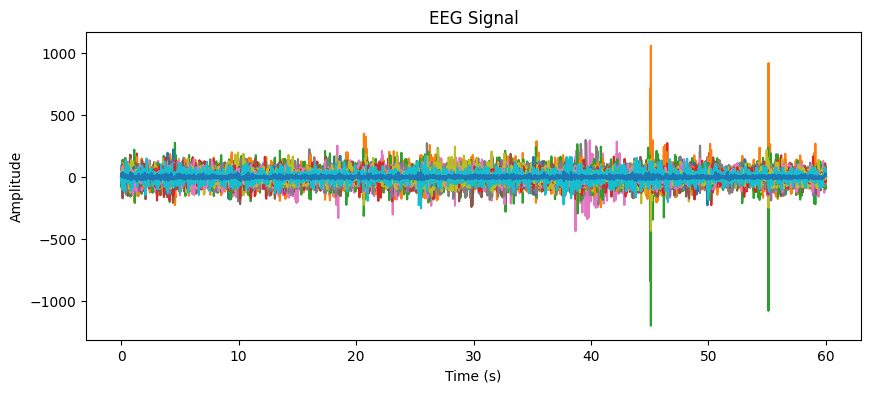

Plotting sub-RID0031, epoch 2


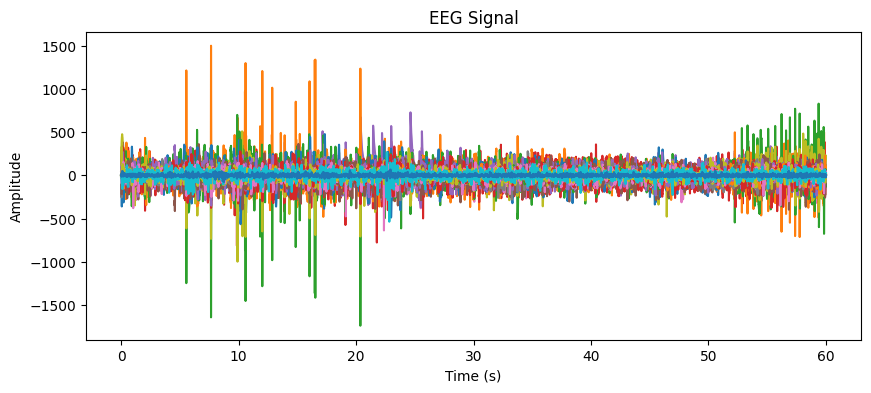

Plotting sub-RID0031, epoch 3


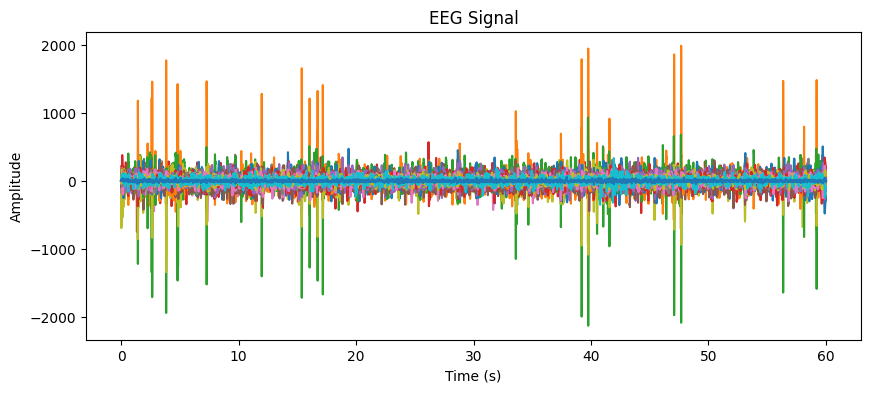

Plotting sub-RID0031, epoch 4


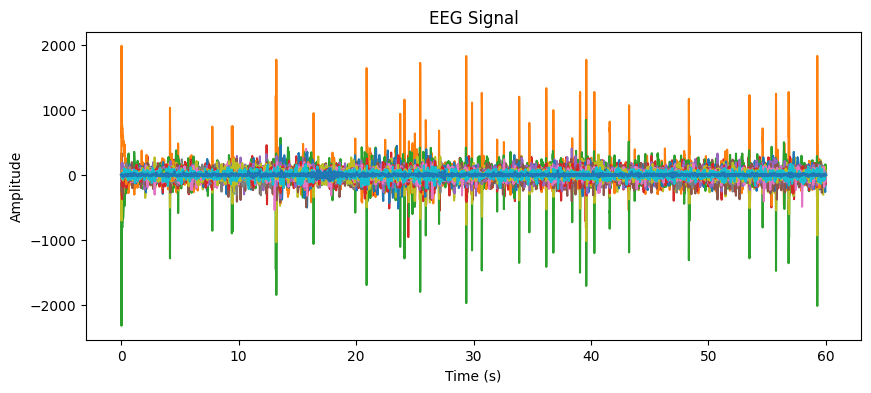

Plotting sub-RID0031, epoch 5


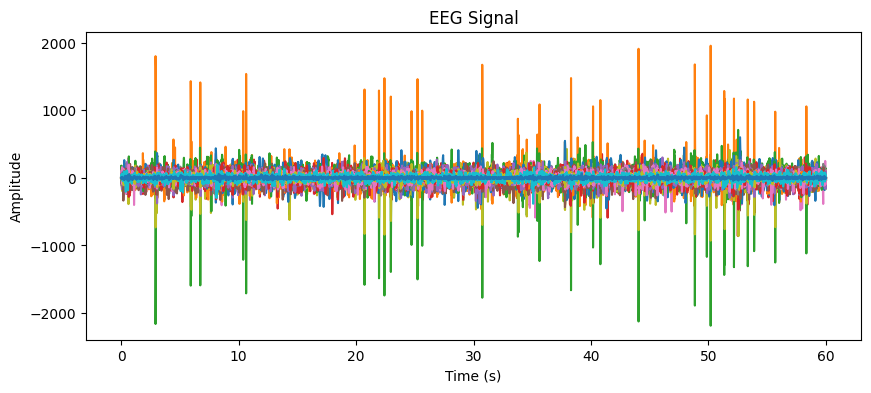

In [3]:
# Define a function to plot EEG signal
def plot_eeg(signal, fs):
    times = np.arange(len(signal)) / fs
    plt.figure(figsize=(10, 4))
    plt.plot(times, signal)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("EEG Signal")
    plt.show()

# Plot the EEG signals for the first subject's first 5 epochs
first_subject = subject_dirs[0]
print(f"\nPlotting EEG signals for subject: {first_subject}")
for epoch in range(1, 6):
    epoch_data = subjects_data[first_subject].get(epoch)
    if epoch_data is not None:
        if 'data' in epoch_data:
            signal = epoch_data['data']
            print(f"Plotting {first_subject}, epoch {epoch}")
            plot_eeg(signal, 200)
        else:
            print(f"Epoch {epoch} for {first_subject} does not contain key 'data'.")
    else:
        print(f"Epoch {epoch} data not found for {first_subject}.")


Debugging

In [2]:
import os
import pandas as pd
import numpy as np

# Base path for the "clean" directory
base_path = "/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/hup/derivatives/clean"

# Get sorted list of subject directories (assumed to start with "sub-")
subject_dirs = sorted([
    d for d in os.listdir(base_path) 
    if os.path.isdir(os.path.join(base_path, d)) and d.startswith("sub-")
])

# Iterate over each subject and epoch file
for subject in subject_dirs:
    subject_path = os.path.join(base_path, subject)
    pkl_files = sorted([f for f in os.listdir(subject_path) if f.endswith('.pkl')])
    
    print(f"\n=== Subject: {subject} | Found {len(pkl_files)} .pkl files ===")
    for idx, pkl_file in enumerate(pkl_files, start=1):
        file_path = os.path.join(subject_path, pkl_file)
        print(f"  Epoch {idx} file: {pkl_file}")
        
        # Load the pickle
        obj = pd.read_pickle(file_path)
        
        # Check if it's a dictionary with 'metadata' and 'data'
        if not isinstance(obj, dict):
            print("    This file is not a dict, type(obj) =", type(obj))
            continue
        
        if 'metadata' not in obj or 'data' not in obj:
            print("    Missing 'metadata' or 'data' keys in this dict.")
            continue
        
        metadata_df = obj['metadata']
        data_obj = obj['data']
        
        print(f"    metadata_df.shape: {metadata_df.shape}")
        
        # Check what type "data" is
        if isinstance(data_obj, pd.DataFrame):
            print(f"    data_obj is a DataFrame with shape: {data_obj.shape}")
            
            # Optional: print row-by-row shape of the values
            # (Be cautious if your data is large—this prints for every electrode!)
            for row_idx in range(min(5, data_obj.shape[0])):  # limit to first 5 for brevity
                row_values = data_obj.iloc[row_idx].values
                print(f"      Row {row_idx} -> row_values.shape = {row_values.shape}")
            
        elif isinstance(data_obj, np.ndarray):
            print(f"    data_obj is a numpy array with shape: {data_obj.shape}")
        elif isinstance(data_obj, list):
            print(f"    data_obj is a list with length {len(data_obj)}")
            if len(data_obj) > 0:
                print("    First element type:", type(data_obj[0]))
                if isinstance(data_obj[0], np.ndarray):
                    print("    First element shape:", data_obj[0].shape)
        else:
            print(f"    data_obj is type: {type(data_obj)}")


=== Subject: sub-RID0031 | Found 20 .pkl files ===
  Epoch 1 file: interictal_eeg_bipolar_clean_0.pkl
    metadata_df.shape: (81, 6)
    data_obj is a DataFrame with shape: (12000, 81)
      Row 0 -> row_values.shape = (81,)
      Row 1 -> row_values.shape = (81,)
      Row 2 -> row_values.shape = (81,)
      Row 3 -> row_values.shape = (81,)
      Row 4 -> row_values.shape = (81,)
  Epoch 2 file: interictal_eeg_bipolar_clean_1.pkl
    metadata_df.shape: (81, 6)
    data_obj is a DataFrame with shape: (12000, 81)
      Row 0 -> row_values.shape = (81,)
      Row 1 -> row_values.shape = (81,)
      Row 2 -> row_values.shape = (81,)
      Row 3 -> row_values.shape = (81,)
      Row 4 -> row_values.shape = (81,)
  Epoch 3 file: interictal_eeg_bipolar_clean_10.pkl
    metadata_df.shape: (81, 6)
    data_obj is a DataFrame with shape: (12000, 81)
      Row 0 -> row_values.shape = (81,)
      Row 1 -> row_values.shape = (81,)
      Row 2 -> row_values.shape = (81,)
      Row 3 -> row_values

Sampling frequency from config is: 200 Hz
Using file: /Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/hup/derivatives/clean/sub-RID0031/interictal_eeg_bipolar_clean_0.pkl
metadata_df shape: (81, 6)
data_df shape before transpose: (12000, 81)
Transposing data_df so each row is an electrode. New shape: (81, 12000)
metadata_df shape (with added 'data' column): (81, 7)
Electrode index 0 has signal shape (12000,)
Number of NaNs in this electrode signal: 0
Number of Inf values in this electrode signal: 0


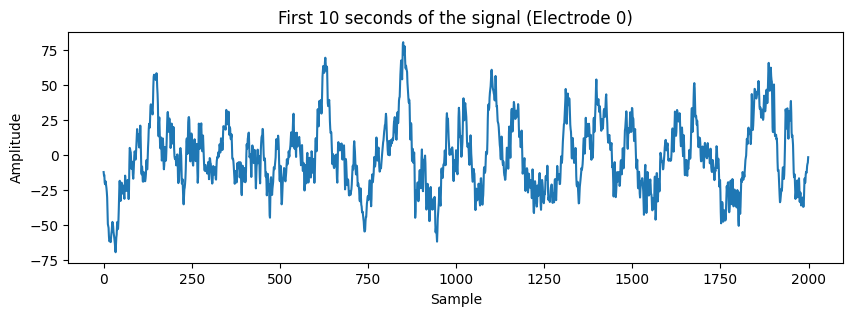

Computing histogram on a 5s segment with length 1000 samples
Filtered segment min/max: -49.05935405412024 61.76374046825961
Histogram computed. hist shape=(26,), bin_edges shape=(27,)

Summary:
  - Sampling frequency from config: 200 Hz
  - metadata_df has 81 electrodes.
  - data_df is now shape (81, 12000), meaning each row is one electrode, each column a time sample.
  - The chosen electrode 0 has 12000 samples total.
  - Check for any NaNs or Infs, plus a quick test histogram on the first 5s of data.
Done debugging!


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, iirnotch, welch
from typing import Optional

# ---------------------------------------------------------------------
# 1) Define or import your config to see the sampling frequency
#    (It's typically a choice you or the data provider made. 
#     If the data was recorded at 200 Hz, we often store that in config.)
# ---------------------------------------------------------------------
config = {
    'preprocessing': {
        'sampling_frequency': 200  # If you're unsure, verify from data's metadata or lab notes
    },
    'features': {
        'spectral': {
            'bands': {
                'delta': [0.5, 4],
                'theta': [4, 8],
                'alpha': [8, 12],
                'beta': [12, 30],
                'gamma': [30, 80]
            }
        }
    }
}
fs = config['preprocessing']['sampling_frequency']
print(f"Sampling frequency from config is: {fs} Hz")

# ---------------------------------------------------------------------
# 2) Choose a subject/epoch to debug
#    Adjust base_path, subject, and epoch_file as needed
# ---------------------------------------------------------------------
base_path = "/Users/tereza/nishant/atlas/atlas_work_terez/atlas_harmonization/Data/hup/derivatives/clean"
subject = "sub-RID0031"
epoch_idx = 1  # e.g. for the first epoch

epoch_file = f"interictal_eeg_bipolar_clean_{epoch_idx-1}.pkl"  # your naming pattern
file_path = os.path.join(base_path, subject, epoch_file)
print("Using file:", file_path)

# ---------------------------------------------------------------------
# 3) Load the data
#    Suppose each pickle is a dict with 'metadata' and 'data' keys
#    If 'data' is shape (12000, N), we transpose so each row is an electrode
# ---------------------------------------------------------------------
obj = pd.read_pickle(file_path)

if not isinstance(obj, dict):
    raise TypeError("The loaded file isn't a dict with 'metadata' and 'data' keys.")
if 'metadata' not in obj or 'data' not in obj:
    raise KeyError("The dict doesn't have 'metadata' or 'data' keys.")

metadata_df = obj['metadata'].copy()
data_df = obj['data'].copy()  # shape (12000, N) if time x channels

print("metadata_df shape:", metadata_df.shape)
print("data_df shape before transpose:", data_df.shape)

if data_df.shape[0] > data_df.shape[1]:
    data_df = data_df.T
    print("Transposing data_df so each row is an electrode. New shape:", data_df.shape)

# Add a 'data' column to metadata for each electrode
def row_to_1d_array(row):
    return row.values

metadata_df['data'] = data_df.apply(row_to_1d_array, axis=1)
print("metadata_df shape (with added 'data' column):", metadata_df.shape)

# ---------------------------------------------------------------------
# 4) Examine one electrode's signal
# ---------------------------------------------------------------------
row_idx = 0  # pick the first electrode to debug
signal = metadata_df.iloc[row_idx]['data']
print(f"Electrode index {row_idx} has signal shape {signal.shape}")

# ---------------------------------------------------------------------
# 5) Apply debug checks for NaNs or infinite values
# ---------------------------------------------------------------------
num_nans = np.count_nonzero(np.isnan(signal))
num_infs = np.count_nonzero(np.isinf(signal))
print(f"Number of NaNs in this electrode signal: {num_nans}")
print(f"Number of Inf values in this electrode signal: {num_infs}")

# Optionally, plot a short snippet of the signal
plt.figure(figsize=(10, 3))
plt.plot(signal[:2000])  # show first 10s if fs=200
plt.title("First 10 seconds of the signal (Electrode 0)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

# ---------------------------------------------------------------------
# 6) Try computing a 5-second segment's histogram
#    This simulates your _compute_entropy_fullts approach
# ---------------------------------------------------------------------
window_size_sec = 5
window_samples = int(window_size_sec * fs)
segment = signal[:window_samples]
print(f"Computing histogram on a {window_size_sec}s segment with length {len(segment)} samples")

# Example filter function (simplified) to replicate your code:
def apply_filters(data: np.ndarray, fs: float) -> np.ndarray:
    b, a = butter(3, 80/(fs/2), btype='low')
    data = filtfilt(b, a, data)
    b, a = butter(3, 1/(fs/2), btype='high')
    data = filtfilt(b, a, data)
    b, a = iirnotch(60, 30, fs)
    data = filtfilt(b, a, data)
    return data

filtered_segment = apply_filters(segment, fs)
print("Filtered segment min/max:", np.nanmin(filtered_segment), np.nanmax(filtered_segment))

if np.isnan(filtered_segment).any():
    print("Filtered segment contains NaNs. That may cause histogram to fail.")
else:
    hist, bin_edges = np.histogram(filtered_segment, bins='auto', density=True)
    print(f"Histogram computed. hist shape={hist.shape}, bin_edges shape={bin_edges.shape}")
    if (hist == 0).all():
        print("Warning: All histogram bins are zero => no variation or possible glitch.")
    
# ---------------------------------------------------------------------
# 7) Summarize what you found
# ---------------------------------------------------------------------
print("\nSummary:")
print(f"  - Sampling frequency from config: {fs} Hz")
print(f"  - metadata_df has {metadata_df.shape[0]} electrodes.")
print(f"  - data_df is now shape {data_df.shape}, meaning each row is one electrode, each column a time sample.")
print(f"  - The chosen electrode {row_idx} has {signal.shape[0]} samples total.")
print("  - Check for any NaNs or Infs, plus a quick test histogram on the first 5s of data.")
print("Done debugging!")
